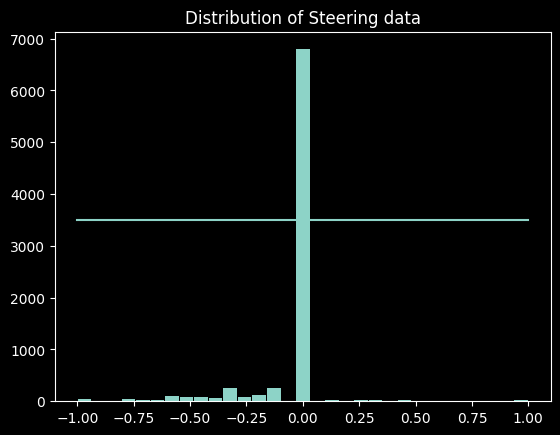

removed imgs:  3295
remain imgs:  4874


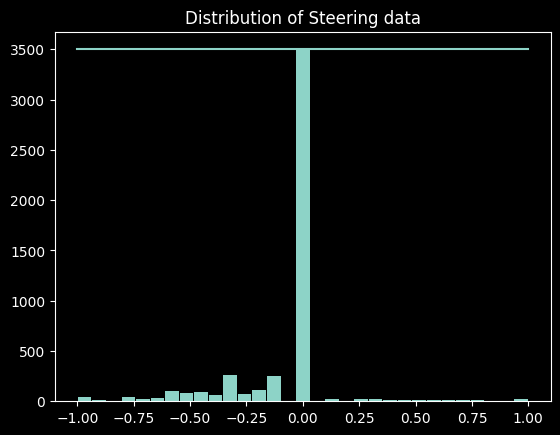

,Center,Left,Right,Steering,Throttle,Brake,Speed
3,center_2022_12_07_20_20_06_539.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,0.00,0.0,0,9.024106
4,center_2022_12_07_20_20_06_659.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,0.00,0.0,0,8.915538
5,center_2022_12_07_20_20_06_777.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,-0.15,0.0,0,8.802803
6,center_2022_12_07_20_20_06_894.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,-0.45,0.0,0,8.644262
7,center_2022_12_07_20_20_07_015.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,-0.75,0.0,0,8.440108
...,...,...,...,...,...,...,...
8160,center_2022_12_08_14_15_18_510.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,0.00,0.0,0,25.228340
8161,center_2022_12_08_14_15_18_582.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,0.00,0.0,0,25.024490
8162,center_2022_12_08_14_15_18_717.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,0.00,0.0,0,24.671700
8163,center_2022_12_08_14_15_18_784.jpg,C:\Users\viet tran\Desktop\cnn_data\IMG\left_2...,C:\Users\viet tran\Desktop\cnn_data\IMG\right_...,0.00,0.0,0,24.522020


In [2]:
from helper import * 

path = 'cnn_data'
df = load_data(f'{path}/driving_log.csv')
df = balance_data(df, 'Steering', sample_remain=3500)
df 

The car go straight most of the time that makes steering values around 0 extremely higher than the other. Drop the steering data to balance the whole dataset. 

In [ ]:
ab

In [3]:
from sklearn.model_selection import train_test_split

img_path, steering = load_data_to_array(path, df)
# fixed value for random_state to keep train and test datasets same each time
X_train, X_val, Y_train, Y_val = train_test_split(img_path, steering, test_size=0.2, random_state=1) 
X_train, Y_train = img_preprocess_pipeline(X_train, Y_train, 1)
X_val, Y_val = img_preprocess_pipeline(X_val, Y_val, 0 )

print(X_train.shape)
print(Y_train.shape)
print("Training imgs: ", len(X_train))
print("Test imgs: ", len(X_val))

KeyboardInterrupt: 

In [ ]:
import wandb
from wandb.keras import WandbCallback
from wandb_config import sweep_config

wandb.init(project='cnn_thesis')

sweep_id = wandb.sweep(sweep_config, project='test')
log_callback = WandbCallback(log_evaluation=True)

In [ ]:
def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        
        optim = build_optimizer('adam', config.learning_rate)
        model = build_network(activation=config.activation, optimizer=optim, dropout=config.dropout)
        
        hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=20,
                        verbose=1, epochs=5, callbacks=[log_callback])

In [ ]:
wandb.agent(sweep_id, train, count=20)

In [ ]:
''' 
Iterations: number of batches to complete one epoch 
Batches: number of training samples in one iteration 
Steps per epoch = number of training sample // batch size
'''
